In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [151]:
df = pd.read_csv("./bike_weather_joined.csv")

df.head()

,Unnamed: 0,TIME,STATION ID,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,rain,temp
0,0,2022-12-01 00:00:03,1,22,9,0.0,7.4
1,1,2022-12-01 00:00:03,2,10,10,0.0,7.4
2,2,2022-12-01 00:00:03,3,7,13,0.0,7.4
3,3,2022-12-01 00:00:03,4,15,5,0.0,7.4
4,4,2022-12-01 00:00:03,5,1,39,0.0,7.4


In [152]:
df['TIME'] = pd.to_datetime(df['TIME'])

In [153]:
cutoff_date = pd.to_datetime('2023-06-01')

In [154]:
df = df[df['TIME']> cutoff_date]

In [155]:
df.dtypes

Unnamed: 0                        int64
TIME                     datetime64[ns]
STATION ID                        int64
AVAILABLE_BIKE_STANDS             int64
AVAILABLE_BIKES                   int64
rain                            float64
temp                            float64
dtype: object

In [156]:
# Get day of the week
df['weekday'] = df['TIME'].dt.day_name()
df['hour'] = df['TIME'].dt.hour
df.head()

,Unnamed: 0,TIME,STATION ID,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,rain,temp,weekday,hour
485207,485207,2023-06-01 00:00:03,1,31,0,0.0,9.0,Thursday,0
485208,485208,2023-06-01 00:00:03,2,10,10,0.0,9.0,Thursday,0
485209,485209,2023-06-01 00:00:03,3,14,6,0.0,9.0,Thursday,0
485210,485210,2023-06-01 00:00:03,4,6,14,0.0,9.0,Thursday,0
485211,485211,2023-06-01 00:00:03,5,6,34,0.0,9.0,Thursday,0


In [157]:
weekdays = df.groupby(['weekday', 'STATION ID'])['AVAILABLE_BIKES'].mean()

In [158]:
weekdays.head(30)

weekday  STATION ID
Friday   1             13.335871
         2              6.437678
         3              7.274025
         4              9.724072
         5             20.760228
         6              4.202664
         7              6.268316
         8             10.167460
         9             11.910561
         10            11.006660
         11             6.090390
         12             5.308278
         13             2.958135
         14            18.134158
         15             3.729781
         16            10.568030
         17             3.653663
         18             8.460514
         19            12.294957
         20             9.952426
         21            14.788773
         22            11.932445
         23            20.035205
         24            11.853473
         25             8.991437
         26             8.202664
         27             8.819220
         28            12.787821
         29            16.163654
         30            

In [159]:
# # weekdays.plot(kind='bar')
# plt.figure()
# for name, groupedData in weekdays.groupby(['NAME']):
#     print(name)
#     groupedData.plot(kind = 'bar', label=name)
#     plt.show()



In [160]:
from sklearn.model_selection import train_test_split
monday = df[(df['weekday']=='Monday') & ( df['STATION ID'] == 1)]

x_train, x_test, y_train, y_test = train_test_split(monday['hour'], monday['AVAILABLE_BIKES'], test_size = 0.4, random_state=23)

In [161]:
monday.head()

,Unnamed: 0,TIME,STATION ID,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,rain,temp,weekday,hour
506525,506525,2023-06-05 00:00:02,1,18,13,0.0,9.4,Monday,0
506639,506639,2023-06-05 00:30:02,1,17,14,0.0,9.2,Monday,0
506753,506753,2023-06-05 01:00:03,1,17,14,0.0,9.2,Monday,1
506867,506867,2023-06-05 01:30:02,1,17,14,0.0,9.2,Monday,1
506981,506981,2023-06-05 02:00:03,1,17,14,0.0,9.2,Monday,2


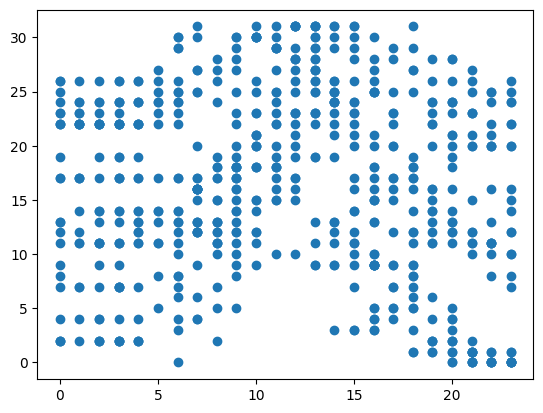

In [162]:
plt.scatter(x_train, y_train)  

In [163]:
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
print(x_train)

[[ 7]
 [ 0]
 [ 6]
 [19]
 [17]
 [12]
 [15]
 [ 5]
 [ 4]
 [15]
 [13]
 [13]
 [19]
 [14]
 [16]
 [20]
 [ 9]
 [ 7]
 [13]
 [23]
 [10]
 [15]
 [15]
 [ 9]
 [ 3]
 [ 1]
 [15]
 [ 8]
 [ 4]
 [12]
 [23]
 [ 3]
 [15]
 [ 8]
 [ 2]
 [20]
 [12]
 [18]
 [17]
 [10]
 [12]
 [23]
 [21]
 [15]
 [20]
 [ 3]
 [ 7]
 [ 7]
 [ 2]
 [11]
 [23]
 [ 9]
 [16]
 [ 3]
 [18]
 [13]
 [20]
 [23]
 [18]
 [11]
 [ 5]
 [19]
 [ 6]
 [ 6]
 [16]
 [ 8]
 [ 4]
 [ 9]
 [21]
 [ 1]
 [21]
 [ 2]
 [ 6]
 [ 5]
 [20]
 [23]
 [ 0]
 [ 6]
 [10]
 [ 5]
 [20]
 [13]
 [19]
 [ 2]
 [15]
 [ 3]
 [12]
 [ 7]
 [16]
 [ 7]
 [20]
 [18]
 [ 9]
 [ 9]
 [23]
 [ 8]
 [ 1]
 [19]
 [12]
 [ 1]
 [ 9]
 [ 4]
 [17]
 [12]
 [13]
 [ 7]
 [13]
 [14]
 [17]
 [ 7]
 [14]
 [10]
 [ 6]
 [21]
 [ 0]
 [15]
 [ 0]
 [22]
 [ 6]
 [ 7]
 [22]
 [ 3]
 [12]
 [ 7]
 [18]
 [18]
 [ 3]
 [18]
 [13]
 [ 8]
 [22]
 [15]
 [ 4]
 [ 9]
 [21]
 [18]
 [19]
 [15]
 [ 6]
 [19]
 [ 6]
 [10]
 [22]
 [17]
 [15]
 [20]
 [14]
 [23]
 [ 7]
 [13]
 [ 4]
 [11]
 [20]
 [10]
 [ 5]
 [ 3]
 [ 7]
 [ 1]
 [11]
 [14]
 [17]
 [22]
 [21]
 [15]
 [16]
 [ 6]
 [12

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [165]:
lr = LinearRegression()

In [166]:
lr.fit(x_train, y_train)

LinearRegression()

In [167]:
c = lr.intercept_
m = lr.coef_
m

array([[-0.13581171]])

In [168]:
y_pred_train = lr.predict(x_train)

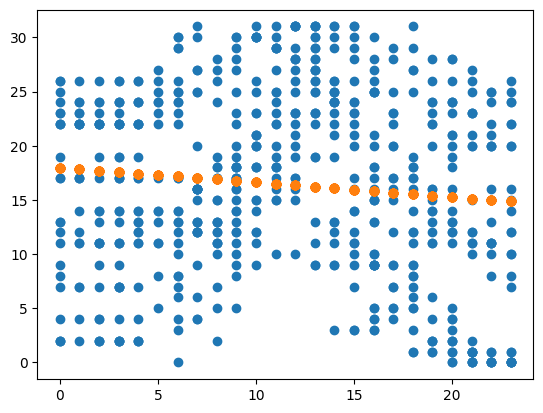

In [169]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train)
plt.show()

In [170]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

print(poly_reg_model.intercept_, poly_reg_model.coef_)



[13.71687891] [[ 0.7180476  -0.00093807 -0.00171574]]


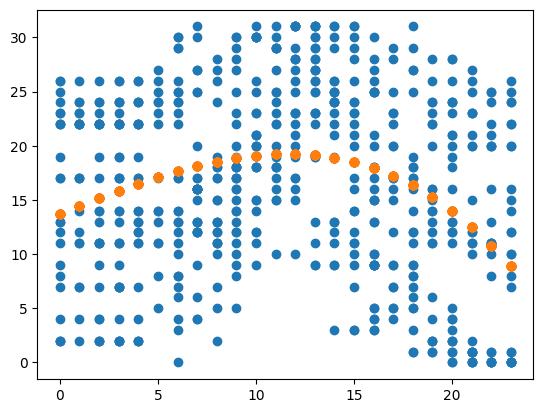

In [171]:
y_pred_train = poly_reg_model.predict(poly_features)
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train)
plt.show()

In [172]:
df = df.drop(columns='TIME')

In [173]:
df = df[df['STATION ID'] == 1]

In [174]:
df = df.dropna()
df['weekday'] = df['weekday'].astype('category')
df['weekday'] = df['weekday'].cat.codes
x = df.drop(columns=['AVAILABLE_BIKES', 'AVAILABLE_BIKE_STANDS'])
# stands = df.drop(columns=) /
y = df['AVAILABLE_BIKES']

/Users/Daniel/anaconda3/envs/comp30830_ml/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/Daniel/anaconda3/envs/comp30830_ml/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/Daniel/anaconda3/envs/comp30830_ml/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


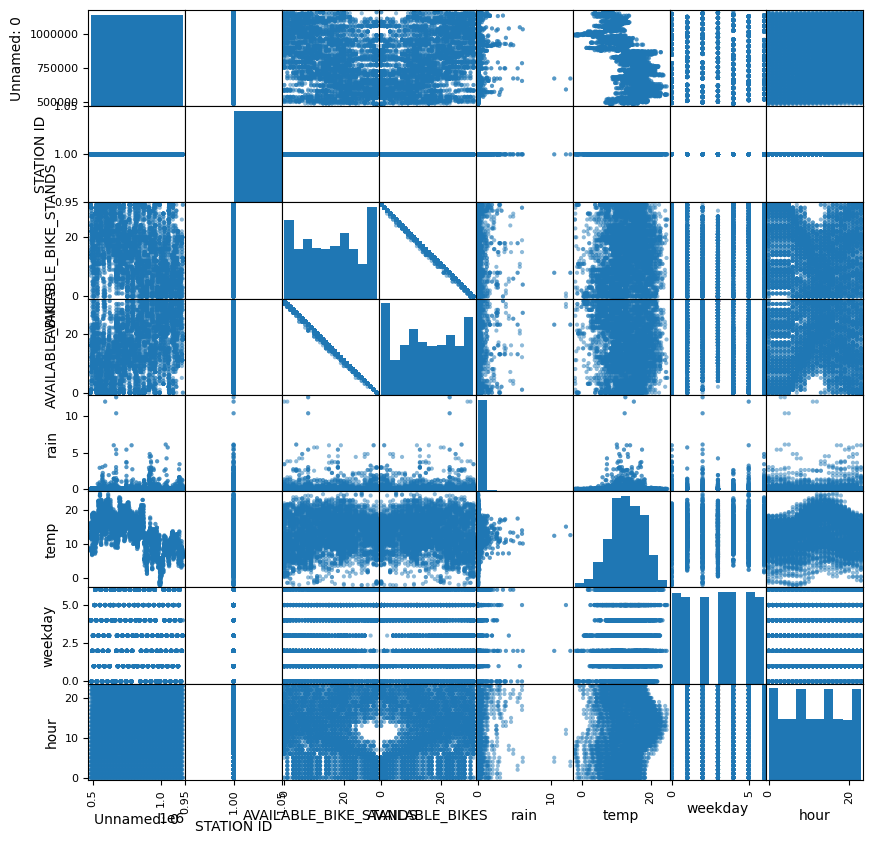

In [175]:
pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()

In [176]:
y

485207      0
485321      0
485435      0
485549      0
485663      0
           ..
1157123    20
1157237    20
1157351    23
1157465     0
1157579     0
Name: AVAILABLE_BIKES, Length: 5899, dtype: int64

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [179]:
lr = LinearRegression()

In [180]:
lr.fit(x_train, y_train)

LinearRegression()

In [181]:
y_pred_train = lr.predict(x_train)

In [182]:
y_pred_train

array([20.89586366,  8.03554984, 16.43913643, ..., 13.9637609 ,
       17.65471196, 13.87418932])

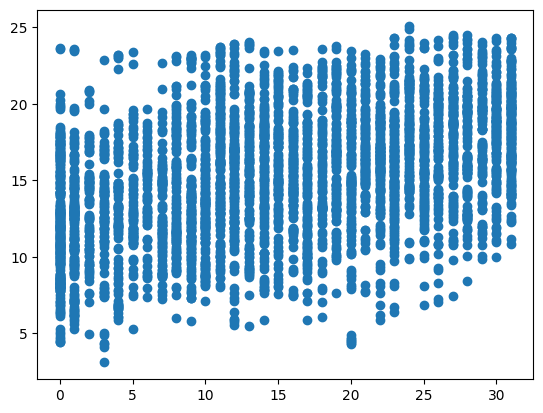

In [183]:
plt.scatter(y_train, y_pred_train)

In [ ]:
y_pred_test = lr.predict(x_test)

In [ ]:
plt.scatter(y_test, y_pred_test)